# Exercise 1
Assume the following parameter values: 
- $\alpha$ = 25.0.
- $\beta$ = 1.0.
- $\sigma_u$ = 10.0.
- $\sigma_e$ = 0.1.
- $\gamma$ = 10.0.
- $\rho$ = 0.5.
- $z_i$ follows a unifrom distribution between 0.0 and 5.0.

Generate a histogram that compares the estimates of $\beta$ using OLS vs IV. You can use the package [linearmodels](https://pypi.org/project/linearmodels/) to get an implement the IV estimation.

In [ ]:
!pip install linearmodels

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 9.8 MB 44.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
matplotlib.rcParams['figure.figsize'] = [12.0,6.0] # Modifies the defult size of plots [6.0,4.0] inches

In [ ]:
# Define parameters
α = 25.0
β = 0.0
σ_u = 10.0
σ_e = 0.1
γ = 10.0
ρ = 0.5
z_min = 0.0
z_max = 5.0
Nobs = 5000 # Number of observations every time we estimate beta
Nsim = 1000 # Number of times we estimate beta

# Store results
β_OLS = []
β_IV = []

for sim in range(Nsim):
    # Create Dataframe
    u = pd.Series(np.random.normal(0.0, σ_u, Nobs))
    e = pd.Series(np.random.normal(0.0, σ_e, Nobs))
    z = pd.Series(np.random.uniform(z_min, z_max, Nobs))

    df = pd.DataFrame({
    'u': u,
    'e': e,
    'z': z
    })
    df['x'] = γ*df['z'] + ρ*df['u'] + df['e']
    df['y'] = α + β*df['x'] + df['u']
    df['constant'] = 1
    
    # Define model OLS
    MyModel = sm.OLS(endog = df['y'], 
                     exog = df[['constant', 'x']])
    
    # Safe estimate
    results = MyModel.fit()
    β_OLS.append(results.params[1])
    
    # Define IV model
    iv = IV2SLS(dependent=df['y'],
            exog=df['constant'],
            endog=df['x'],
            instruments=df['z']).fit(cov_type='unadjusted')
    β_IV.append(iv.params[1])

# Convert list to series
β_OLS = pd.Series(β_OLS)
β_IV = pd.Series(β_IV)

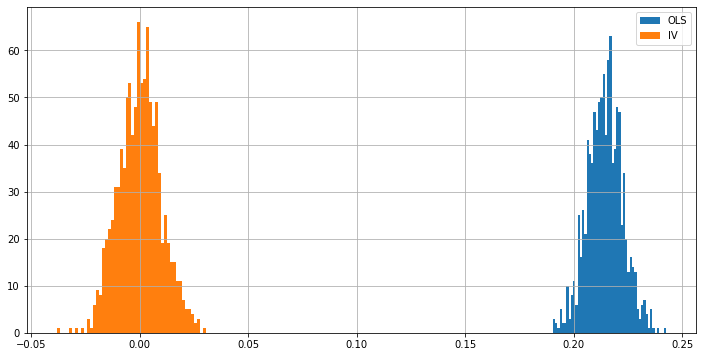

In [ ]:
β_OLS.hist(bins=50)
β_IV.hist(bins=50)
plt.legend(['OLS','IV'])
plt.show()

# Exercise 2
Load data from Acemoglu, Johnson, and Robinson (AER-2001) and use their instrument to estimate the relationship between GDP per capita and institutions. Do not forget to restrict the sample to countries with full information.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
MyFolder = '/content/drive/My Drive/Colab Notebooks/2021_2022_Programming_for_Statistical_Analysis/'
MyFile = MyFolder + 'DataIV_AJR_2001.dta' 

In [ ]:
# Load data
dfAJR = pd.read_stata(MyFile)

# Set proper index (Country abbreviation)
dfAJR.index = dfAJR['shortnam']
dfAJR = dfAJR.drop(columns = ['shortnam'])

# Keep only observations with all data
dfAJR = dfAJR[dfAJR['baseco'] == 1]
dfAJR

In [ ]:
# Create constant
dfAJR['constant'] = 1

iv = IV2SLS(dependent=dfAJR['logpgp95'],
            exog=dfAJR['constant'],
            endog=dfAJR['avexpr'],
            instruments=dfAJR['logem4']).fit(cov_type='unadjusted')

print(iv.summary)